# Prediction with NonLinear Regression
1. K-Nearest Neighbours(KNN)

  📌 Predictions are made based on observation similarity.

2. NonLinear Support Vector Regression(N-SVR)

  📌 The goal is to define the curve so that it can get the maximum point in the range of a margin with the smallest error.

3. Artificial Neural Network(ANN)

  📌 It is one of the powerful machine learning algorithms that can be used for classification and regression problems that refer to the way the human brain processes information.

4. Classification and Regression Trees(CART)

  📌 The aim is to transform the complex structures in the data set into simple decision structures. 

5. Bagged Trees

  📌 It is based on the evaluation of the predictions produced by more than one tree created with the Bootstrap method.

6. Random Forests(RF)

  📌 It is based on the evaluation of the predictions produced by multiple decision trees.

7. Gradient Boosting Machines(GBM)

  📌 It is a generalized version of AdaBoost that can be easily adapted to classification and regression problems. A series of models in the form of a single predictive model are constructed on the residuals.

8. Extreme Gradient Boosting(XGBoost)

  📌 XGBoost is optimized to increase the speed and prediction performance of GBM. It is scalable and can be integrated into different platforms.

9. LightGBM

  📌 LightGBM is another type of GBM developed to increase the training time performance of XGBoost.

10. Category Boosting(CatBoost)

  📌 It is another fast, successful type of GBM that can automatically deal with categorical variables.

## Import Necessary Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
!pip install xgboost
from xgboost import XGBRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Dataset

In [123]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5000,N


## General Information About to the Dataset

In [124]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [125]:
check_df(df)

######################### Head #########################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors   Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20      NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W      632       43      10 475.0000         N
2    479   130     18    66   72     76      3    1624    457      63    224   266     263      A        W      880       82      14 480.0000         A
3    496   141     20    65   78     37     11    5628   1575     225    828   838     354      N        E      200       11       3 500.0000         N
4    321    87     10    39   42     30      2     396    101      12     48    46      33      N        E      805       40       4  91.5000         N
######################### Tail 

## Analysis of Categorical and Numerical Variables

In [126]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [127]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 322
Variables: 20
Cat_cols: 3
Num_cols: 17
Cat_but_car: 0


In [128]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [129]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

   League  Ration
A     175 54.3478
N     147 45.6522
##########################################


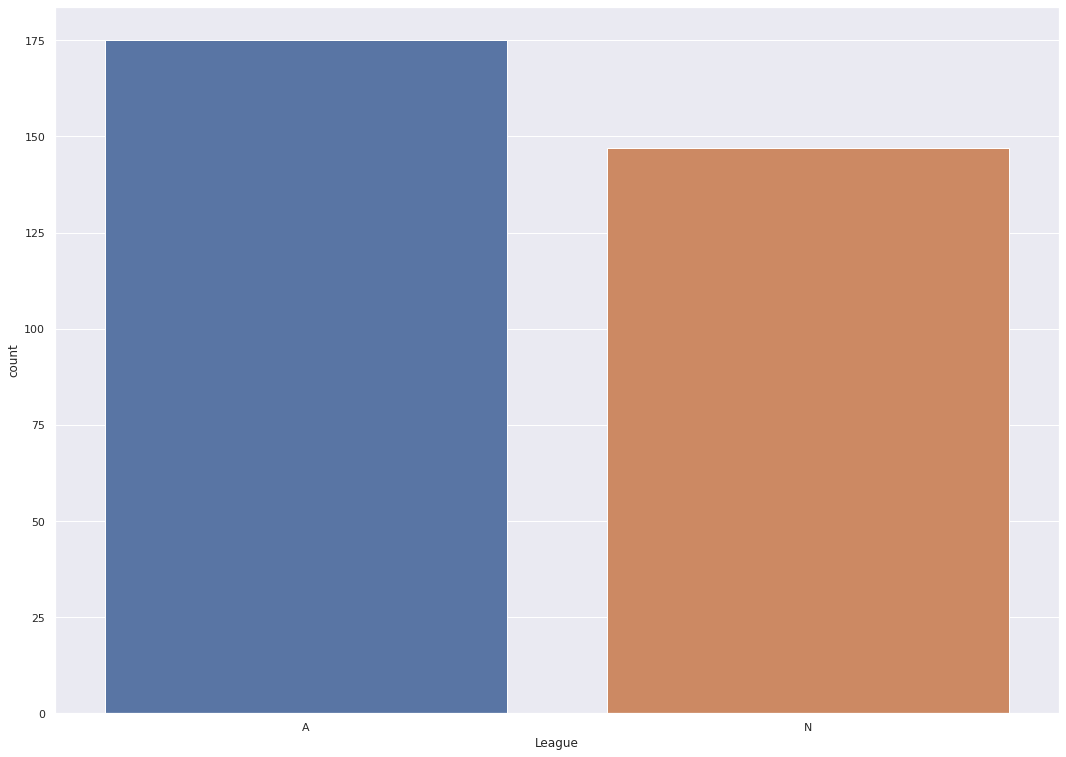

   Division  Ration
W       165 51.2422
E       157 48.7578
##########################################


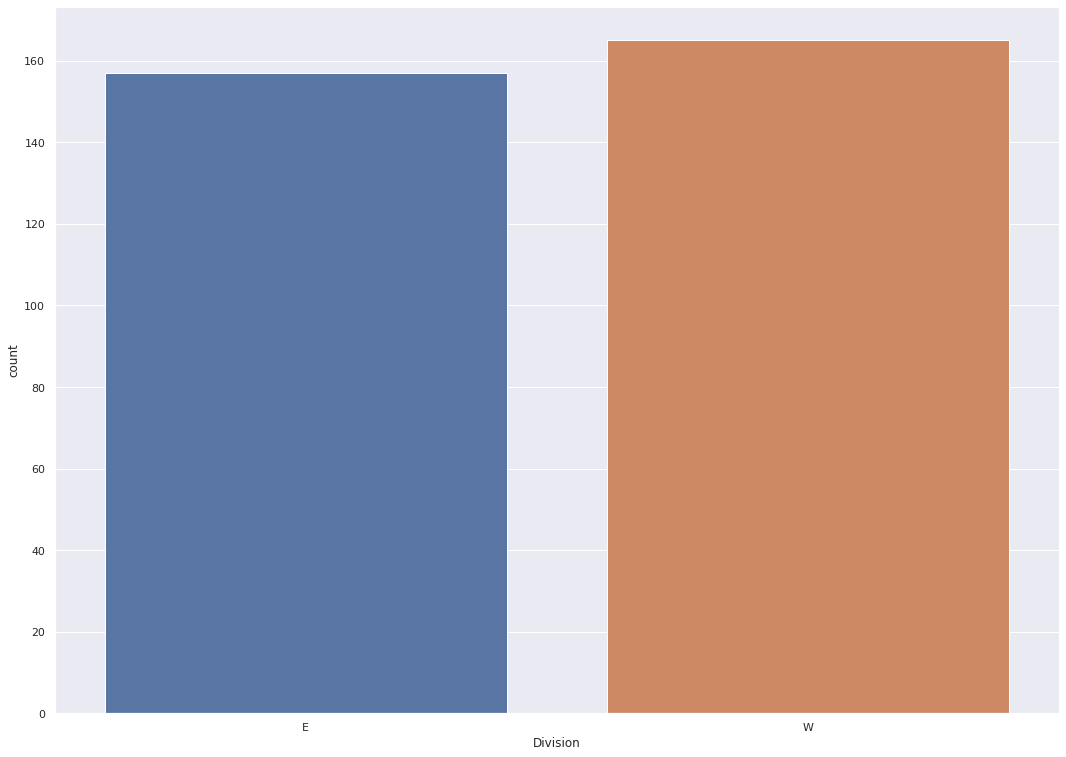

   NewLeague  Ration
A        176 54.6584
N        146 45.3416
##########################################


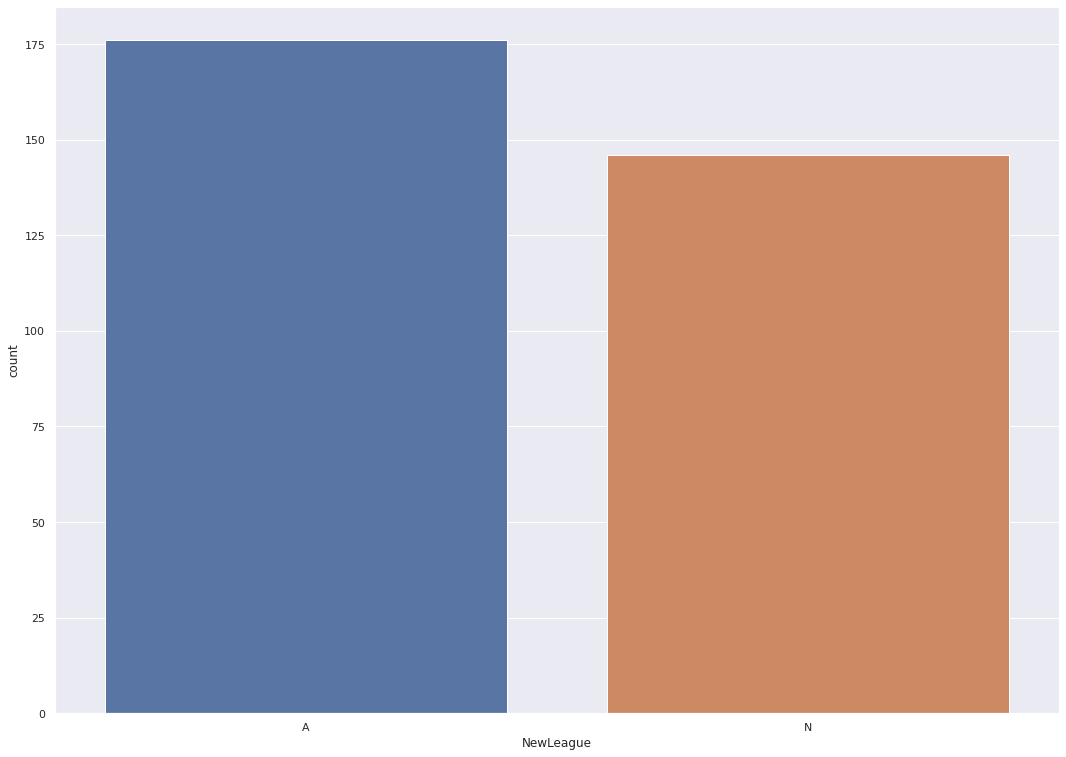

In [130]:
cat_summary_df(df)

In [131]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [132]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   322.0000
mean    380.9286
std     153.4050
min      16.0000
1%       20.4200
5%      161.0000
10%     194.1000
20%     221.8000
30%     281.3000
40%     321.8000
50%     379.5000
60%     430.2000
70%     490.0000
80%     535.6000
90%     584.9000
95%     609.9000
99%     658.5900
max     687.0000
Name: AtBat, dtype: float64


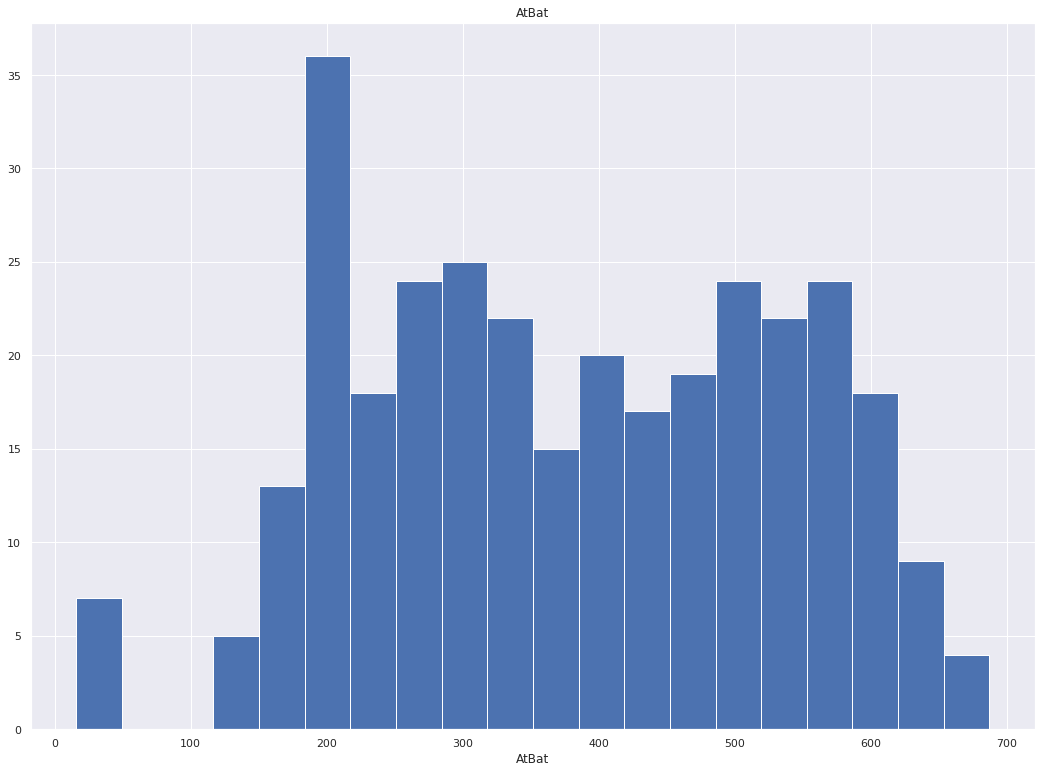

count   322.0000
mean    101.0248
std      46.4547
min       1.0000
1%        4.4200
5%       39.0000
10%      45.1000
20%      57.0000
30%      70.0000
40%      82.0000
50%      96.0000
60%     113.0000
70%     128.7000
80%     144.0000
90%     163.0000
95%     174.0000
99%     210.7900
max     238.0000
Name: Hits, dtype: float64


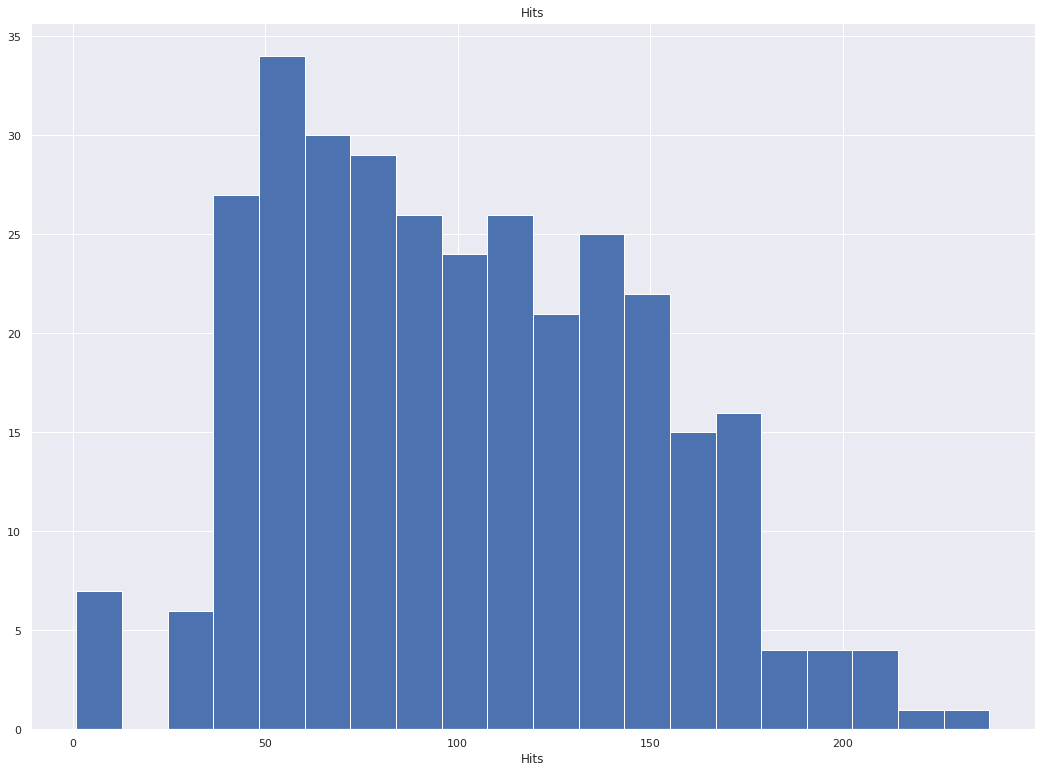

count   322.0000
mean     10.7702
std       8.7090
min       0.0000
1%        0.0000
5%        0.0000
10%       1.0000
20%       3.0000
30%       5.0000
40%       6.0000
50%       8.0000
60%      10.6000
70%      14.0000
80%      18.0000
90%      24.0000
95%      28.9500
99%      33.0000
max      40.0000
Name: HmRun, dtype: float64


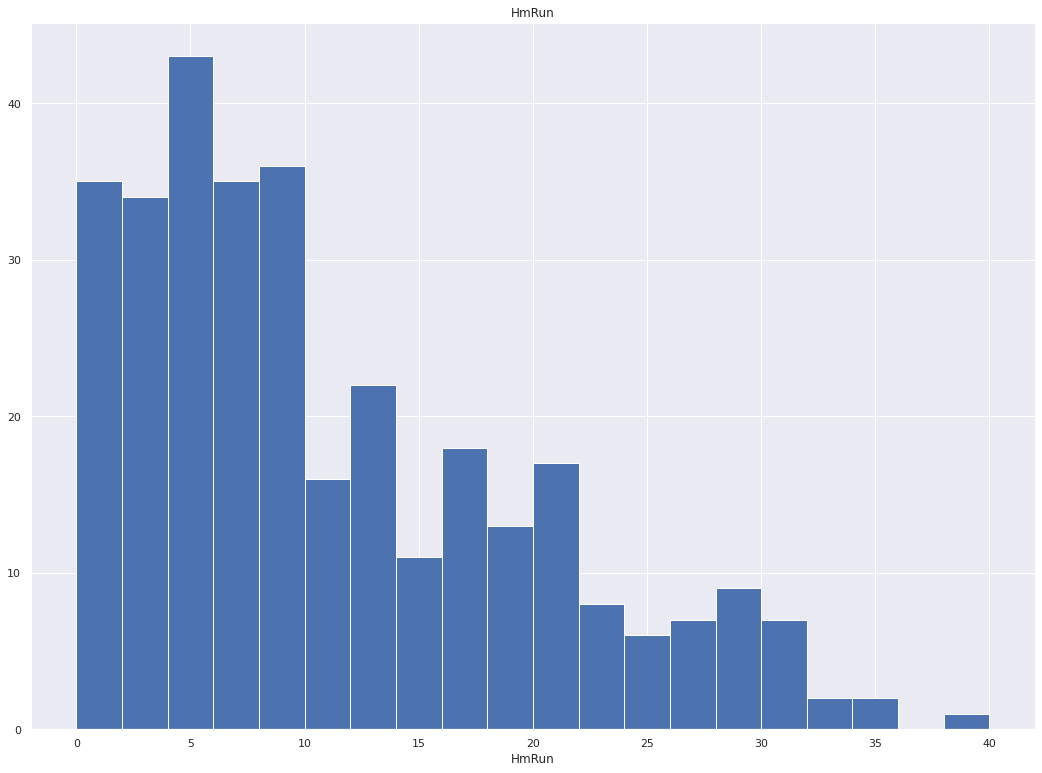

count   322.0000
mean     50.9099
std      26.0241
min       0.0000
1%        1.2100
5%       17.0000
10%      20.1000
20%      27.0000
30%      33.0000
40%      41.0000
50%      48.0000
60%      55.6000
70%      66.0000
80%      75.8000
90%      89.0000
95%      94.0000
99%     107.7900
max     130.0000
Name: Runs, dtype: float64


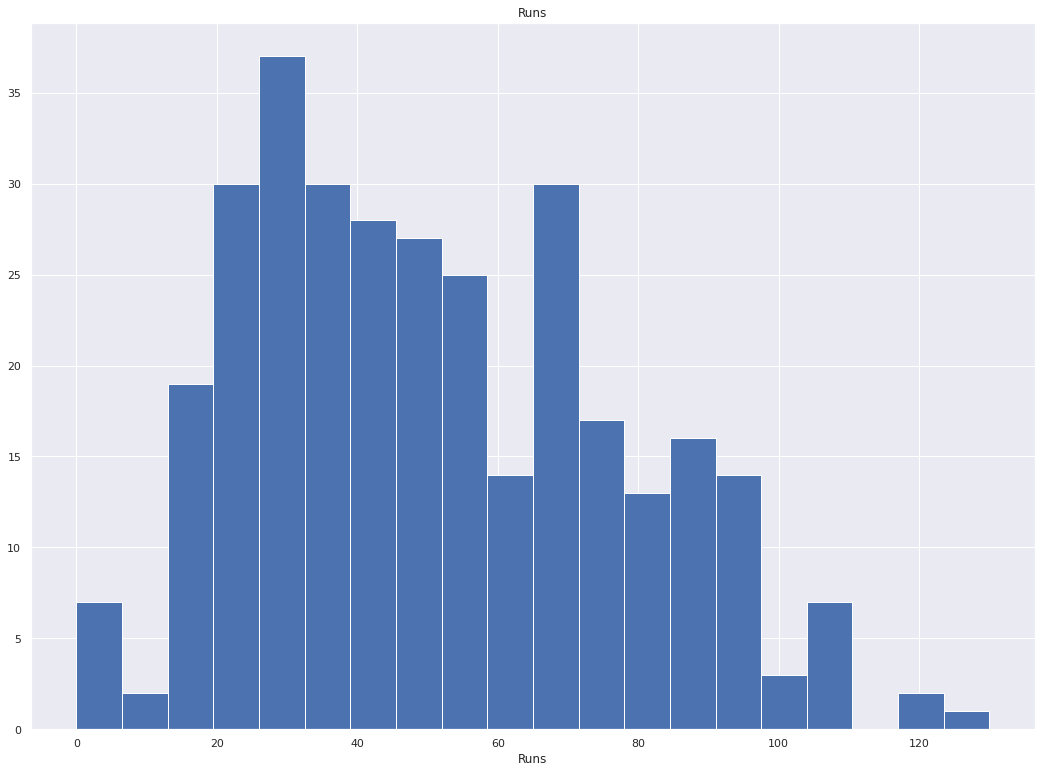

count   322.0000
mean     48.0280
std      26.1669
min       0.0000
1%        2.0000
5%       14.0000
10%      19.0000
20%      26.0000
30%      30.0000
40%      36.4000
50%      44.0000
60%      49.0000
70%      58.0000
80%      73.0000
90%      86.0000
95%      96.0000
99%     112.3700
max     121.0000
Name: RBI, dtype: float64


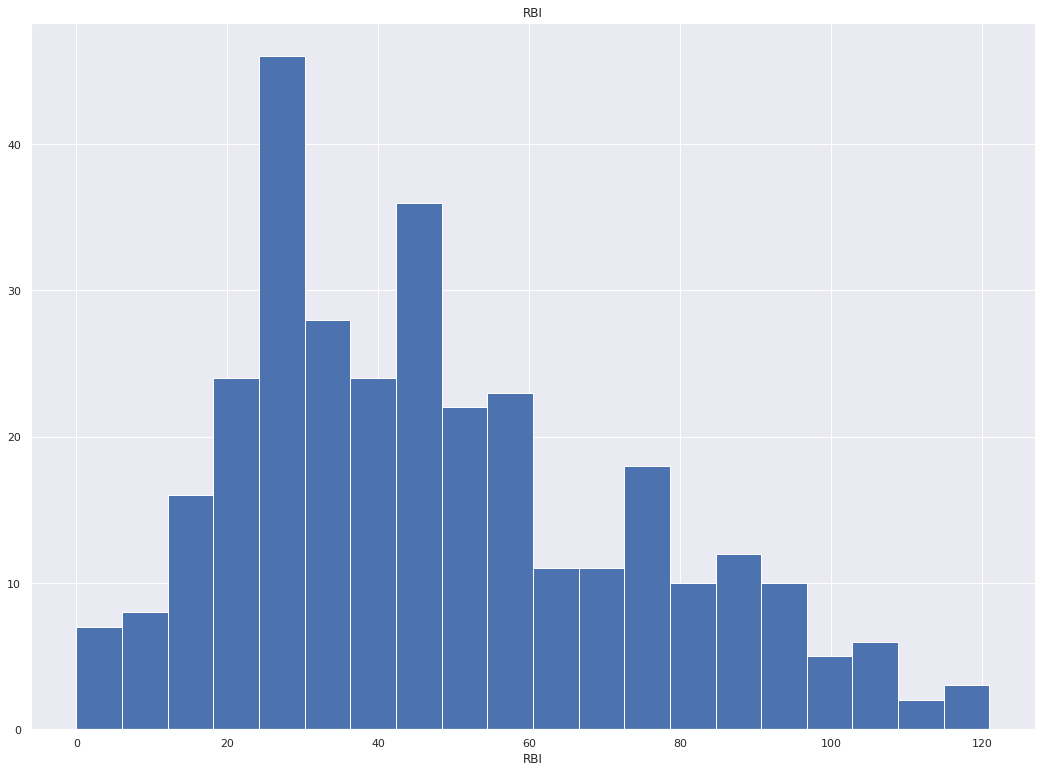

count   322.0000
mean     38.7422
std      21.6393
min       0.0000
1%        1.0000
5%       11.0500
10%      15.0000
20%      20.0000
30%      24.0000
40%      30.0000
50%      35.0000
60%      40.0000
70%      48.7000
80%      59.0000
90%      69.9000
95%      78.0000
99%      93.5800
max     105.0000
Name: Walks, dtype: float64


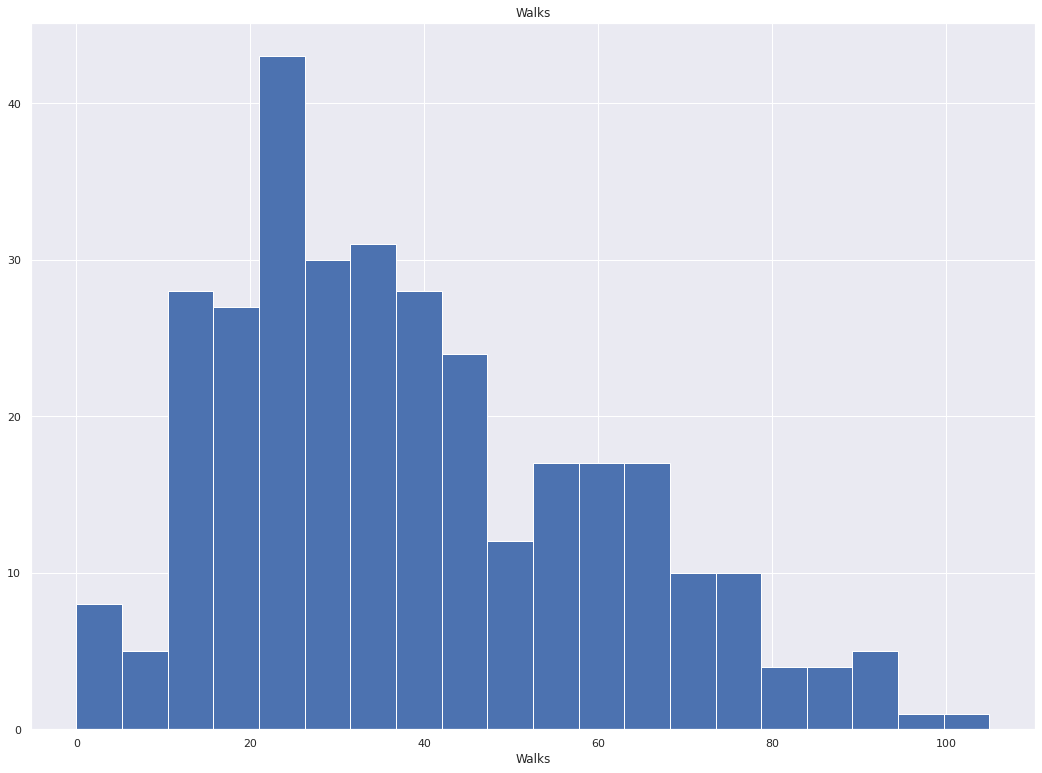

count   322.0000
mean      7.4441
std       4.9261
min       1.0000
1%        1.0000
5%        1.0000
10%       2.0000
20%       3.0000
30%       4.0000
40%       5.0000
50%       6.0000
60%       7.6000
70%      10.0000
80%      12.0000
90%      15.0000
95%      17.0000
99%      19.7900
max      24.0000
Name: Years, dtype: float64


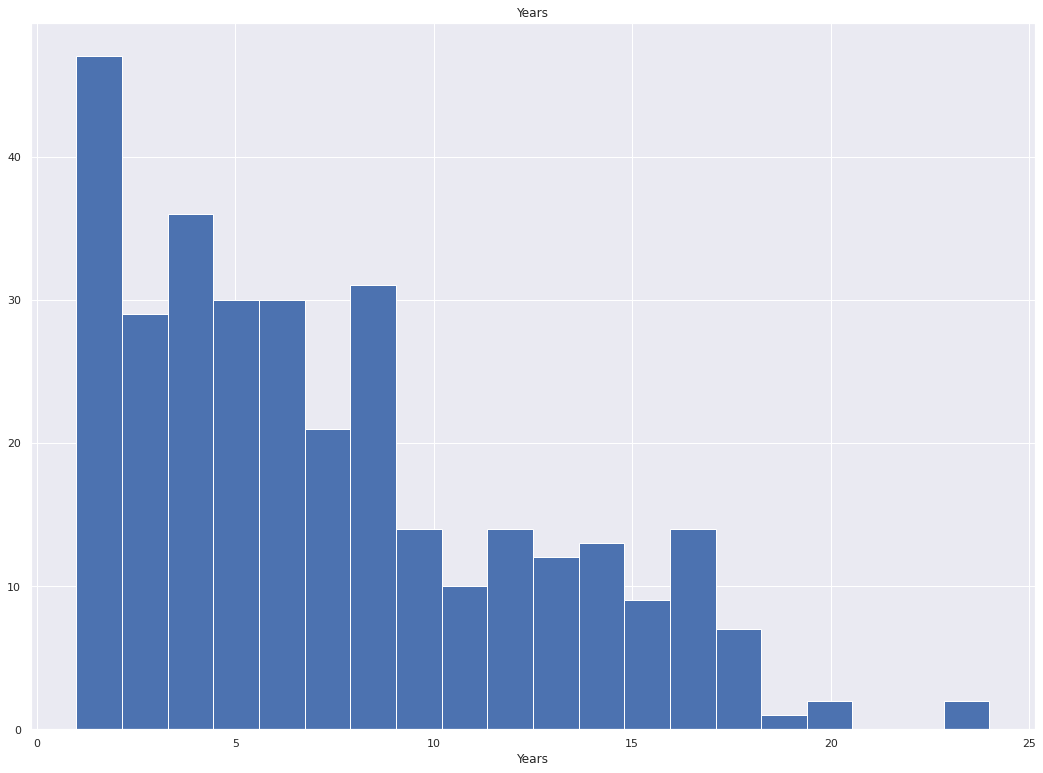

count     322.0000
mean     2648.6832
std      2324.2059
min        19.0000
1%         41.0000
5%        216.5000
10%       342.2000
20%       667.6000
30%       963.4000
40%      1402.2000
50%      1928.0000
60%      2654.0000
70%      3365.0000
80%      4483.0000
90%      6123.4000
95%      7125.6000
99%      8749.9700
max     14053.0000
Name: CAtBat, dtype: float64


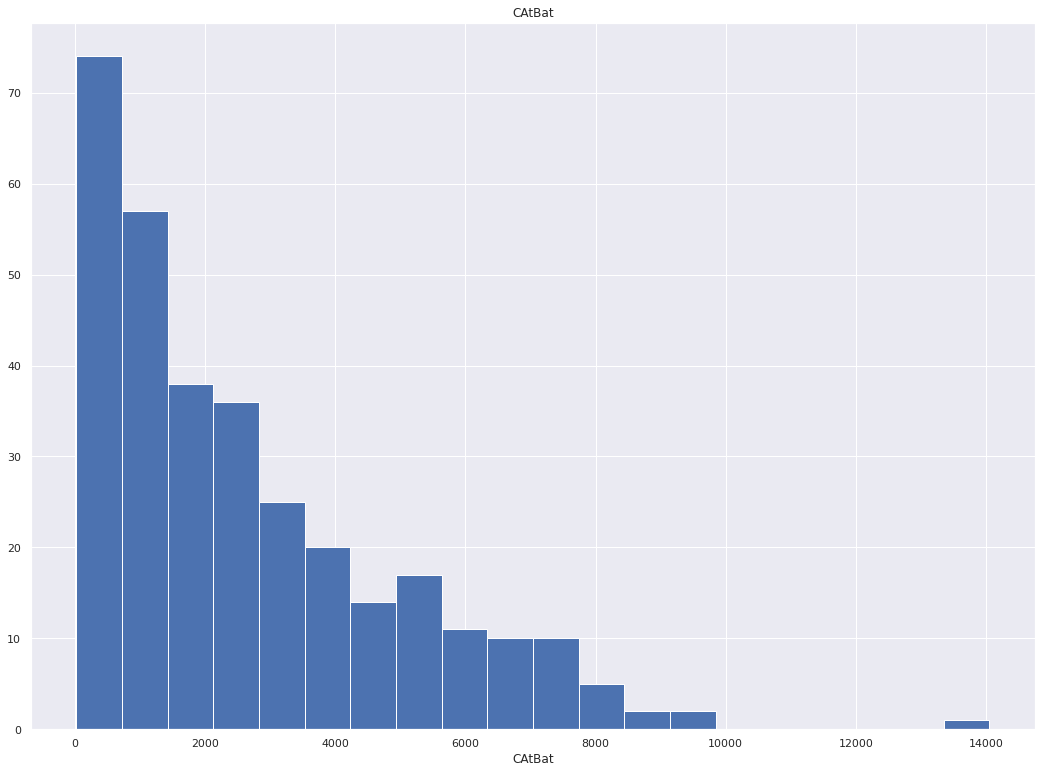

count    322.0000
mean     717.5714
std      654.4726
min        4.0000
1%         9.8400
5%        54.0000
10%       86.0000
20%      164.6000
30%      238.0000
40%      355.8000
50%      508.0000
60%      708.2000
70%      911.1000
80%     1229.2000
90%     1659.6000
95%     2017.1500
99%     2500.3400
max     4256.0000
Name: CHits, dtype: float64


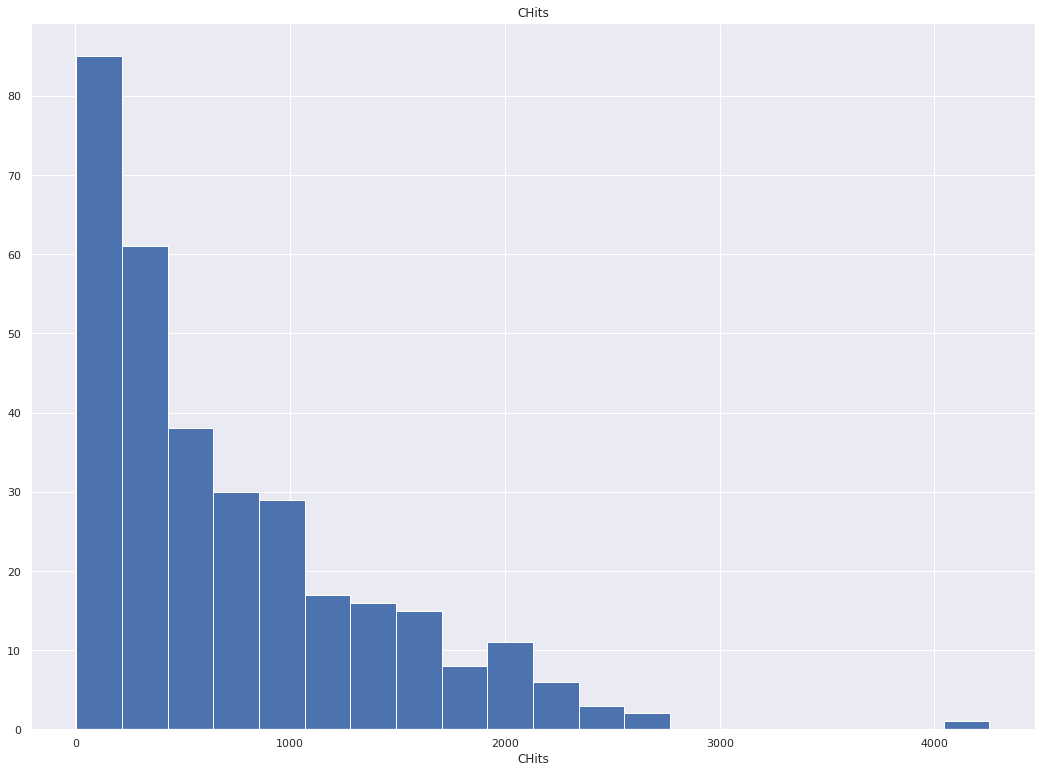

count   322.0000
mean     69.4907
std      86.2661
min       0.0000
1%        0.0000
5%        2.0000
10%       4.0000
20%      10.2000
30%      16.3000
40%      27.4000
50%      37.5000
60%      51.2000
70%      72.4000
80%     103.8000
90%     194.9000
95%     265.6500
99%     373.1200
max     548.0000
Name: CHmRun, dtype: float64


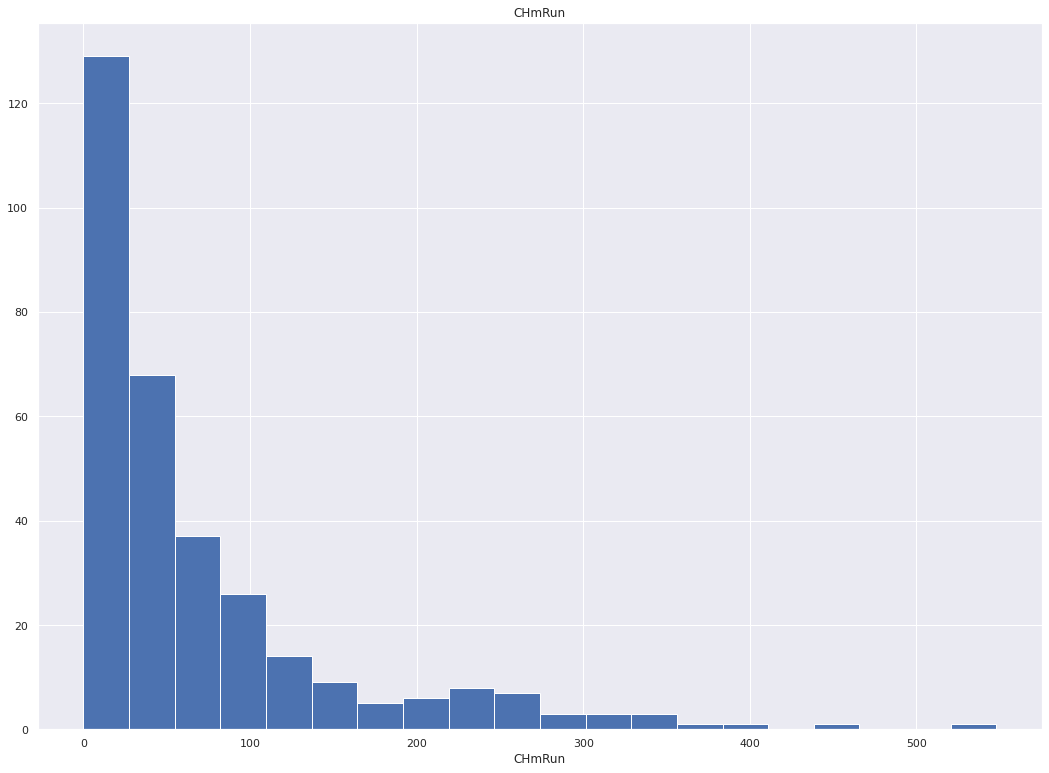

count    322.0000
mean     358.7950
std      334.1059
min        1.0000
1%         3.6300
5%        27.0000
10%       38.1000
20%       80.4000
30%      117.3000
40%      181.0000
50%      247.0000
60%      333.0000
70%      443.4000
80%      627.2000
90%      895.7000
95%     1032.3000
99%     1174.3700
max     2165.0000
Name: CRuns, dtype: float64


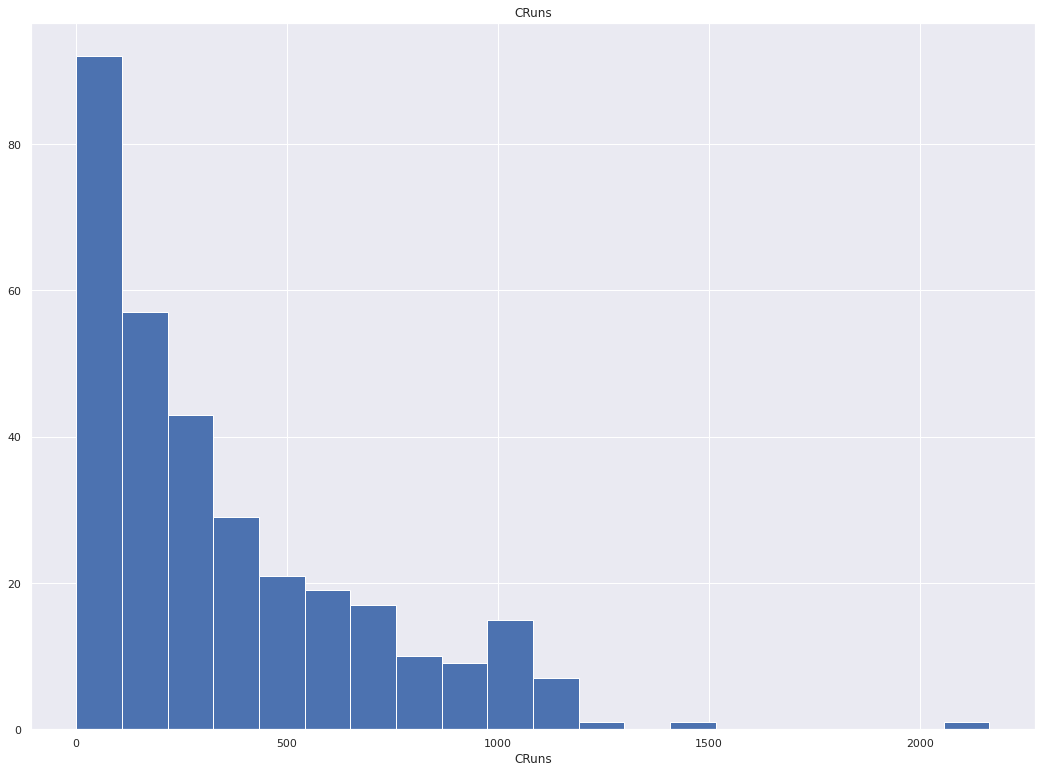

count    322.0000
mean     330.1180
std      333.2196
min        0.0000
1%         4.6300
5%        22.0500
10%       34.1000
20%       70.2000
30%      106.3000
40%      149.0000
50%      220.5000
60%      303.6000
70%      379.1000
80%      496.2000
90%      861.6000
95%     1071.7500
99%     1310.8500
max     1659.0000
Name: CRBI, dtype: float64


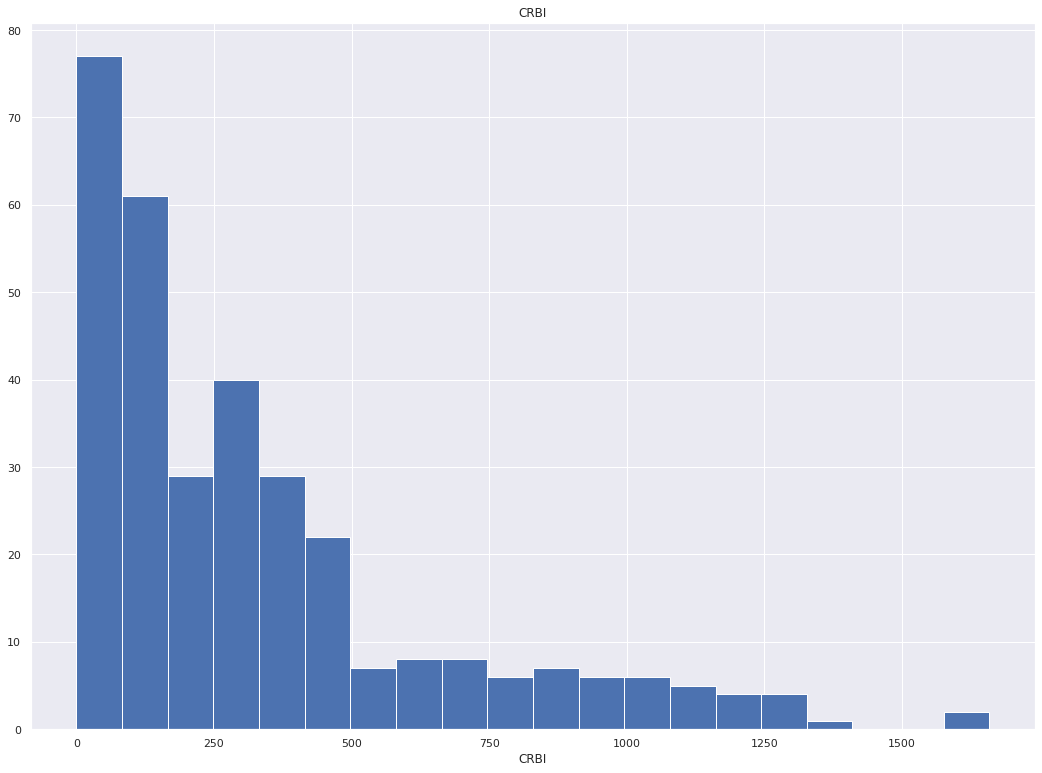

count    322.0000
mean     260.2391
std      267.0581
min        0.0000
1%         4.0000
5%        15.0500
10%       30.1000
20%       55.0000
30%       82.0000
40%      117.4000
50%      170.5000
60%      226.6000
70%      300.7000
80%      421.0000
90%      643.9000
95%      817.6000
99%     1139.1400
max     1566.0000
Name: CWalks, dtype: float64


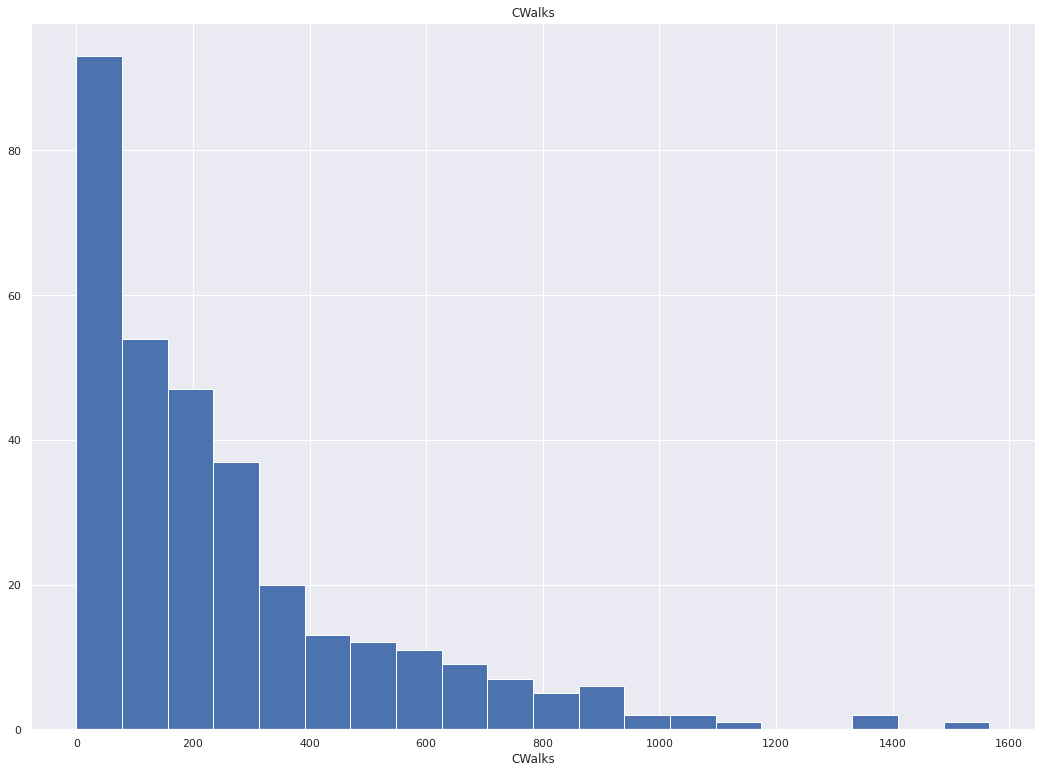

count    322.0000
mean     288.9379
std      280.7046
min        0.0000
1%         0.0000
5%        33.2000
10%       62.2000
20%       99.6000
30%      132.0000
40%      167.0000
50%      212.0000
60%      257.4000
70%      303.0000
80%      365.8000
90%      685.6000
95%      910.6500
99%     1301.1900
max     1378.0000
Name: PutOuts, dtype: float64


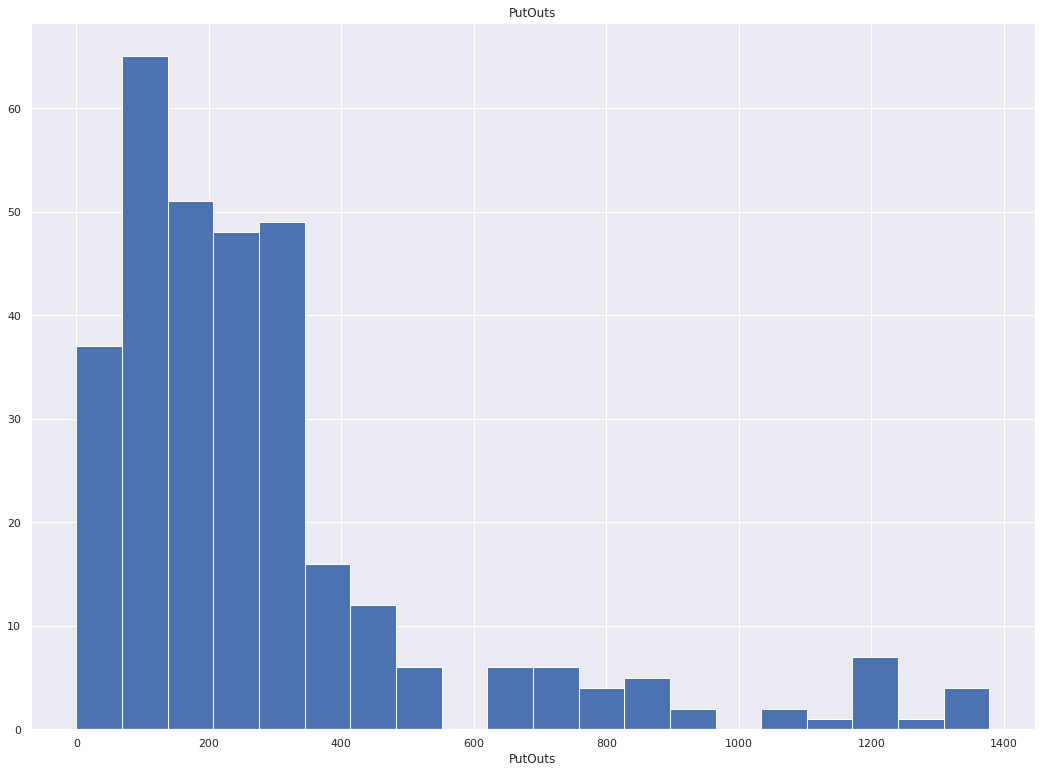

count   322.0000
mean    106.9130
std     136.8549
min       0.0000
1%        0.0000
5%        0.0000
10%       2.0000
20%       5.2000
30%       9.0000
40%      15.4000
50%      39.5000
60%      76.8000
70%     134.8000
80%     210.8000
90%     353.3000
95%     431.4500
99%     478.1600
max     492.0000
Name: Assists, dtype: float64


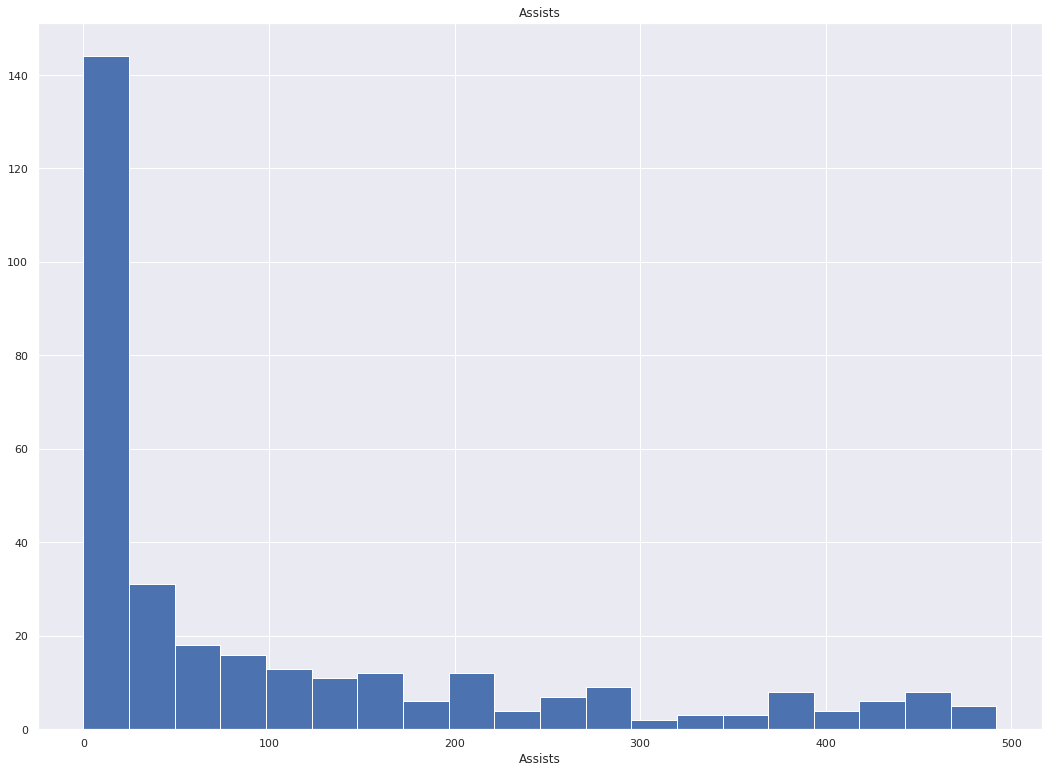

count   322.0000
mean      8.0404
std       6.3684
min       0.0000
1%        0.0000
5%        0.0000
10%       1.0000
20%       3.0000
30%       4.0000
40%       5.0000
50%       6.0000
60%       8.0000
70%      10.0000
80%      13.0000
90%      17.0000
95%      20.0000
99%      25.7900
max      32.0000
Name: Errors, dtype: float64


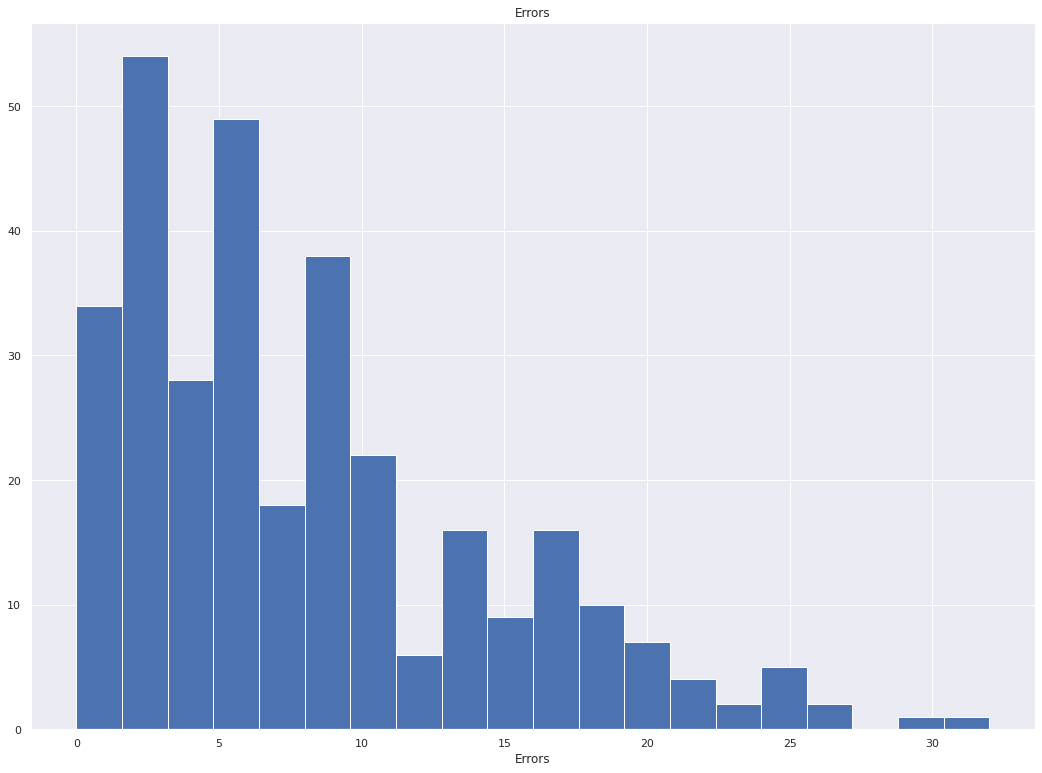

count    263.0000
mean     535.9259
std      451.1187
min       67.5000
1%        70.0000
5%        86.6000
10%      100.0000
20%      155.0000
30%      221.0000
40%      300.0000
50%      425.0000
60%      538.0000
70%      700.0000
80%      809.0000
90%     1048.6666
95%     1346.0000
99%     2032.8865
max     2460.0000
Name: Salary, dtype: float64


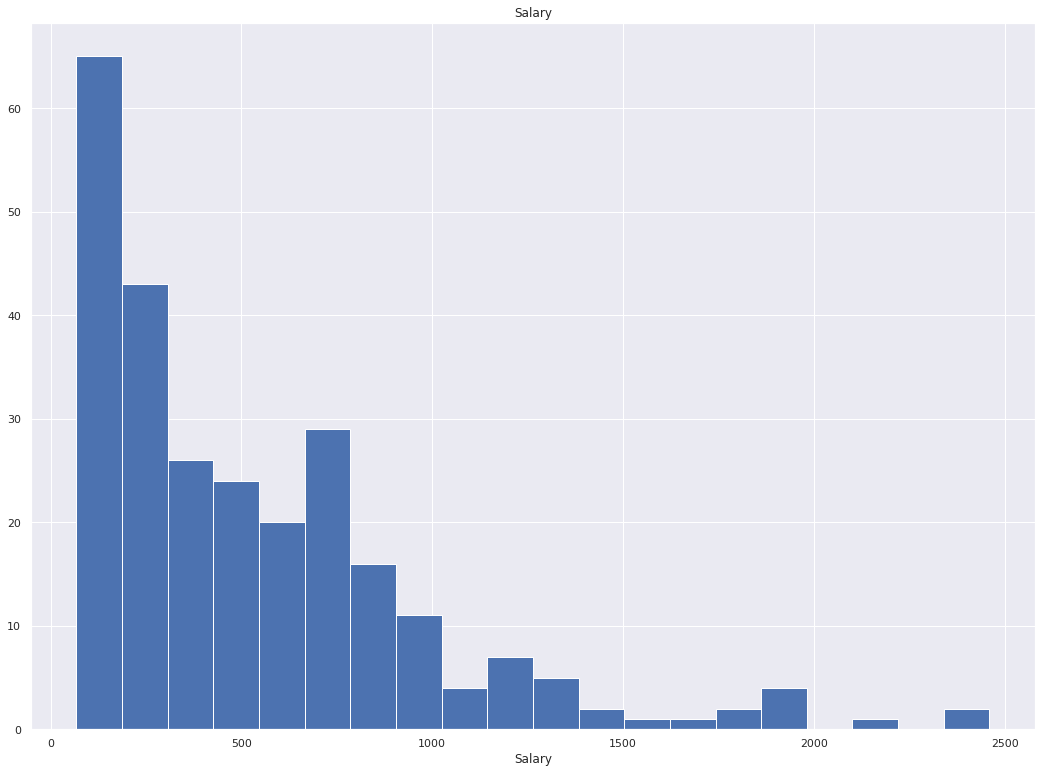

In [133]:
num_summary_df(df)

In [134]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(categorical_col)
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                      "Count": dataframe[categorical_col].value_counts(),
                      "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}))
  print("#############################################")

In [135]:
def target_summary_with_cat_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    target_summary_with_cat(dataframe, target, col)

In [136]:
target_summary_with_cat_df(df, "Salary")

League
   TARGET_MEAN  Count   Ratio
A     541.9995    175 54.3478
N     529.1175    147 45.6522
#############################################
Division
   TARGET_MEAN  Count   Ratio
E     624.2714    157 48.7578
W     450.8769    165 51.2422
#############################################
NewLeague
   TARGET_MEAN  Count   Ratio
A     537.1130    176 54.6584
N     534.5539    146 45.3416
#############################################


## Correlation Analysis

In [137]:
df[num_cols].corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.0000,0.9679,0.5922,0.9131,0.8205,0.6698,0.0474,0.2355,0.2527,0.2367,0.2665,0.2441,0.1661,0.3175,0.3538,0.3521,0.3948
Hits,0.9679,1.0000,0.5622,0.9222,0.8111,0.6412,0.0448,0.2276,0.2558,0.2027,0.2618,0.2320,0.1518,0.3107,0.3205,0.3100,0.4387
HmRun,0.5922,0.5622,1.0000,0.6510,0.8551,0.4810,0.1163,0.2219,0.2206,0.4932,0.2624,0.3520,0.2332,0.2829,-0.1063,0.0393,0.3430
Runs,0.9131,0.9222,0.6510,1.0000,0.7982,0.7322,0.0045,0.1865,0.2048,0.2279,0.2506,0.2060,0.1822,0.2793,0.2206,0.2405,0.4199
RBI,0.8205,0.8111,0.8551,0.7982,1.0000,0.6160,0.1462,0.2947,0.3082,0.4418,0.3233,0.3932,0.2509,0.3432,0.1066,0.1934,0.4495
Walks,0.6698,0.6412,0.4810,0.7322,0.6160,1.0000,0.1365,0.2772,0.2807,0.3325,0.3385,0.3086,0.4245,0.2995,0.1497,0.1294,0.4439
Years,0.0474,0.0448,0.1163,0.0045,0.1462,0.1365,1.0000,0.9203,0.9036,0.7269,0.8829,0.8688,0.8385,-0.0047,-0.0806,-0.1621,0.4007
CAtBat,0.2355,0.2276,0.2219,0.1865,0.2947,0.2772,0.9203,1.0000,0.9951,0.7988,0.9833,0.9492,0.9065,0.0623,0.0020,-0.0669,0.5261
CHits,0.2527,0.2558,0.2206,0.2048,0.3082,0.2807,0.9036,0.9951,1.0000,0.7833,0.9846,0.9451,0.8910,0.0765,-0.0025,-0.0628,0.5489
CHmRun,0.2367,0.2027,0.4932,0.2279,0.4418,0.3325,0.7269,0.7988,0.7833,1.0000,0.8202,0.9295,0.8000,0.1127,-0.1585,-0.1381,0.5249


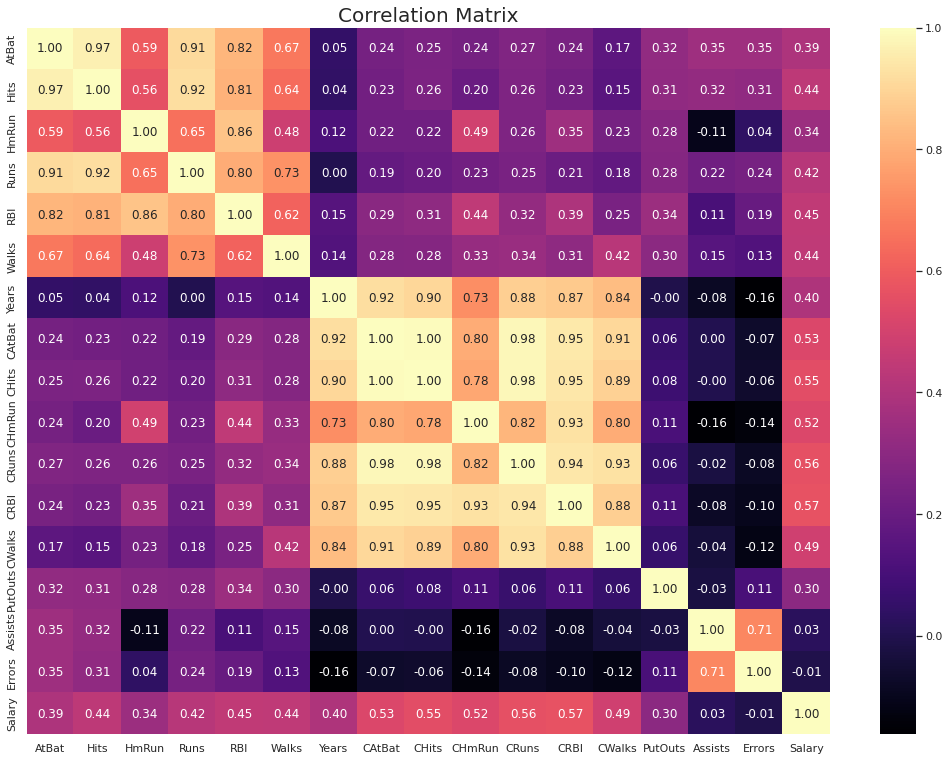

In [138]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [139]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

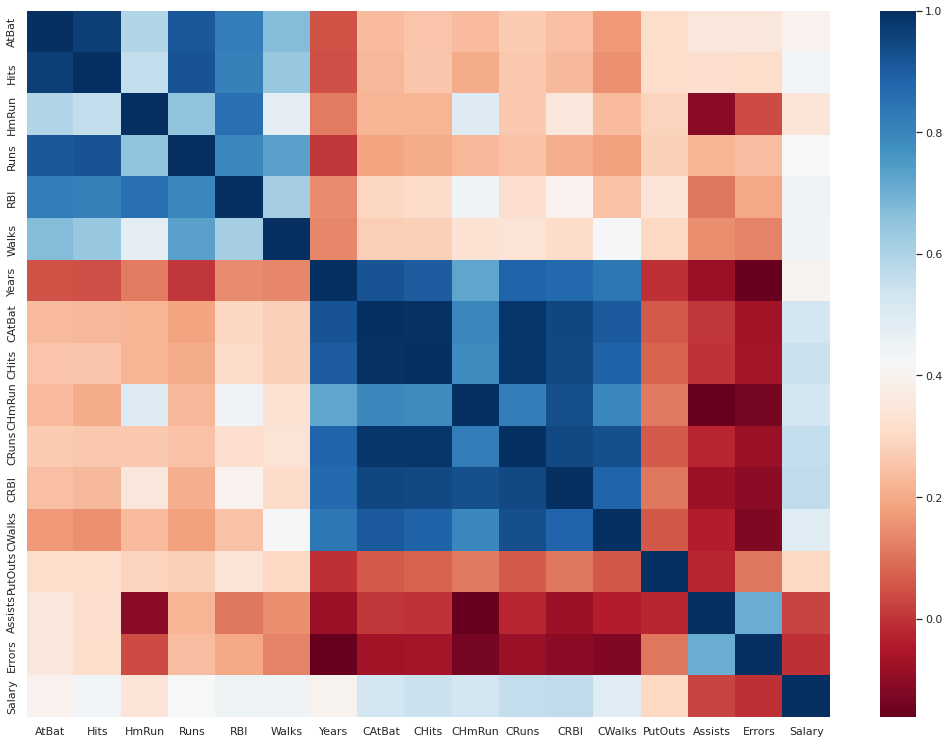

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [140]:
high_correlated_cols(df[num_cols], plot=True)

In [141]:
df.corrwith(df["Salary"]).sort_values(ascending=False)

Salary     1.0000
CRBI       0.5670
CRuns      0.5627
CHits      0.5489
CAtBat     0.5261
CHmRun     0.5249
CWalks     0.4898
RBI        0.4495
Walks      0.4439
Hits       0.4387
Runs       0.4199
Years      0.4007
AtBat      0.3948
HmRun      0.3430
PutOuts    0.3005
Assists    0.0254
Errors    -0.0054
dtype: float64

## Feature Engineering

## Missing Value Analysis

In [142]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [143]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [144]:
na_columns = missing_value_table(df, na_name=True)

        n_miss   ratio
Salary      59 18.3200


In [145]:
df["Salary"].fillna(df["Salary"].median(), inplace=True)

In [146]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

## One-Hot Encoding

In [147]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [148]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [149]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,425.0000,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0000,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0000,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0000,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5000,1,0,1


# K-Nearest Neighbours(KNN)

  📌 Predictions are made based on observation similarity.

In [150]:
def KNN_Regressor(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  knn_regressor_model = KNeighborsRegressor().fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, knn_regressor_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, knn_regressor_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, knn_regressor_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, knn_regressor_model.predict(X_test))
    r2_train = r2_score(y_train, knn_regressor_model.predict(X_train))
    r2_test = r2_score(y_test, knn_regressor_model.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  return knn_regressor_model

In [151]:
knn_regressor_model = KNN_Regressor(df, "Salary", results=True)

MSE_train:  70553.730
RMSE_train:  265.620
MSE_test:  156598.891
RMSE_test:  395.726
MAE_train:  167.132
MAE_test:  245.620
R2_train:  0.521
R2_test:  0.350


In [152]:
def KNN_Regressor_model_tuning(dataframe, target, k=30, cv=10, results=False, iteration_report=False):
  import warnings
  warnings.filterwarnings("ignore")
  
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  knn_params = {"n_neighbors": np.arange(1,k,1)}
  knn_regressor_model = KNeighborsRegressor()
  knn_cv_regressor_model = GridSearchCV(knn_regressor_model, knn_params, cv=cv).fit(X_train, y_train)
  knn_regressor_tuned = KNeighborsRegressor(n_neighbors=knn_cv_regressor_model.best_params_["n_neighbors"]).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, knn_regressor_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, knn_regressor_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, knn_regressor_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, knn_regressor_tuned.predict(X_test))
    r2_train = r2_score(y_train, knn_regressor_tuned.predict(X_train))
    r2_test = r2_score(y_test, knn_regressor_tuned.predict(X_test))
    print("Best KNN: ", knn_cv_regressor_model.best_params_["n_neighbors"])
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  if iteration_report:
    RMSE = []
    RMSE_CV = []
    print("############################### KNN & KNN_CV ###############################")
    for k_num in range(k):
      k_num = k_num + 1
      knn_regressor_model = KNeighborsRegressor(n_neighbors=k_num).fit(X_train, y_train)
      y_pred = knn_regressor_model.predict(X_train)
      rmse = np.sqrt(mean_squared_error(y_train, y_pred))
      rmse_cv = np.sqrt(-1*cross_val_score(knn_regressor_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean())
      RMSE.append(rmse)
      RMSE_CV.append(rmse_cv)
      print("k = ", k_num, " RMSE = ", round(rmse, 4) , " RMSE_CV = ", round(rmse_cv, 4))

  return knn_regressor_tuned

In [153]:
knn_regressor_tuned = KNN_Regressor_model_tuning(df, "Salary", results=True, iteration_report=True)

Best KNN:  14
MSE_train:  84941.296
RMSE_train:  291.447
MSE_test:  156250.807
RMSE_test:  395.286
MAE_train:  185.916
MAE_test:  241.512
R2_train:  0.424
R2_test:  0.352
############################### KNN & KNN_CV ###############################
k =  1  RMSE =  0.0  RMSE_CV =  375.5661
k =  2  RMSE =  180.7925  RMSE_CV =  340.9114
k =  3  RMSE =  223.0974  RMSE_CV =  337.8116
k =  4  RMSE =  250.3872  RMSE_CV =  333.9123
k =  5  RMSE =  265.6195  RMSE_CV =  317.6949
k =  6  RMSE =  261.8703  RMSE_CV =  318.0608
k =  7  RMSE =  269.6286  RMSE_CV =  317.9041
k =  8  RMSE =  275.5982  RMSE_CV =  319.688
k =  9  RMSE =  283.0615  RMSE_CV =  317.1355
k =  10  RMSE =  284.1443  RMSE_CV =  315.3608
k =  11  RMSE =  285.7897  RMSE_CV =  316.2636
k =  12  RMSE =  288.2721  RMSE_CV =  314.773
k =  13  RMSE =  289.3014  RMSE_CV =  315.442
k =  14  RMSE =  291.4469  RMSE_CV =  315.1031
k =  15  RMSE =  290.5377  RMSE_CV =  316.3611
k =  16  RMSE =  293.148  RMSE_CV =  317.8051
k =  17  RMSE =  2

# NonLinear Support Vector Regression(N-SVR)

📌 The goal is to define the curve so that it can get the maximum point in the range of a margin with the smallest error.

In [154]:
def SVR_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  svr_model = SVR(kernel="rbf").fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, svr_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, svr_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, svr_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, svr_model.predict(X_test))
    r2 = svr_model.score(X, y)
    r2_train = svr_model.score(X_train, y_train)
    r2_test = svr_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return svr_model

In [155]:
SVR_model = SVR_model(df, "Salary", results=True)

MSE_train:  146394.073
RMSE_train:  382.615
MSE_test:  255077.567
RMSE_test:  505.052
MAE_train:  256.856
MAE_test:  301.544
R2:  -0.005
R2_train:  0.007
R2_test:  -0.058


In [156]:
def SVR_model_tuning(dataframe, target, CParams=[0.1,0.2,0.4,0.7,1,2,3,5,8,10], cv=10 ,results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  svr_model = SVR(kernel="rbf")
  svr_params = {"C": CParams}
  svr_cv_model = GridSearchCV(svr_model, svr_params, cv=cv).fit(X_train, y_train)
  svr_model_tuned = SVR(kernel="rbf", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, svr_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, svr_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, svr_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, svr_model_tuned.predict(X_test))
    r2 = svr_model_tuned.score(X, y)
    r2_train = svr_model_tuned.score(X_train, y_train)
    r2_test = svr_model_tuned.score(X_test, y_test)
    print("C best Params: ", pd.Series(svr_cv_model.best_params_)[0])
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return svr_model_tuned

In [157]:
SVR_model_tuning = SVR_model_tuning(df, "Salary", results=True)

C best Params:  10
MSE_train:  125643.773
RMSE_train:  354.463
MSE_test:  218483.741
RMSE_test:  467.422
MAE_train:  229.358
MAE_test:  272.903
R2:  0.138
R2_train:  0.147
R2_test:  0.094


# Artificial Neural Network(ANN)

📌 It is one of the powerful machine learning algorithms that can be used for classification and regression problems that refer to the way the human brain processes information.

In [158]:
def ANN_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test) 
  ann_model = MLPRegressor().fit(X_train, y_train)


  if results:
    mse_train = mean_squared_error(y_train, ann_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, ann_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, ann_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, ann_model.predict(X_test))
    r2 = ann_model.score(X, y)
    r2_train = ann_model.score(X_train, y_train)
    r2_test = ann_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return ann_model

In [159]:
ann_model = ANN_model(df, "Salary", results=True)

MSE_train:  271585.676
RMSE_train:  521.139
MSE_test:  416379.752
RMSE_test:  645.275
MAE_train:  393.509
MAE_test:  476.538
R2:  -73835.173
R2_train:  -0.843
R2_test:  -0.727


In [160]:
def ANN_model_tuning(dataframe, target, cv=10, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test) 
  ann_model = MLPRegressor()
  ann_params = {"alpha": [0.1, 0.01, 0.2, 0.02, 0.3, 0.003],
                "hidden_layer_sizes": [(100, 50), (100, 100, 50), (200, 100, 50)]}
  ann_cv_model = GridSearchCV(ann_model, ann_params, cv=cv).fit(X_train, y_train)
  ann_model_tuned = MLPRegressor(alpha=ann_cv_model.best_params_["alpha"], hidden_layer_sizes=ann_cv_model.best_params_["hidden_layer_sizes"]).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, ann_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, ann_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, ann_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, ann_model_tuned.predict(X_test))
    r2 = ann_model_tuned.score(X, y)
    r2_train = ann_model_tuned.score(X_train, y_train)
    r2_test = ann_model_tuned.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return ann_model_tuned

In [161]:
ann_model_tuned = ANN_model_tuning(df, "Salary", results=True)

MSE_train:  76937.089
RMSE_train:  277.375
MSE_test:  128797.962
RMSE_test:  358.884
MAE_train:  203.731
MAE_test:  253.297
R2:  -698804.900
R2_train:  0.478
R2_test:  0.466


# Classification and Regression Trees(CART)

📌 The aim is to transform the complex structures in the data set into simple decision structures.

In [162]:
def CART_model(dataframe, target, results=False, Decisions=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

  cart_model = DecisionTreeRegressor().fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, cart_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, cart_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, cart_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, cart_model.predict(X_test))
    r2_train = cart_model.score(X_train, y_train)
    r2_test = cart_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  if Decisions:
    !pip install skompiler
    from skompiler import skompile
    print(skompile(cart_model.predict).to("python/code"))


  return cart_model

In [163]:
cart_model = CART_model(df, "Salary", results=True, Decisions=True)

MSE_train:  0.000
RMSE_train:  0.000
MSE_test:  167979.564
RMSE_test:  409.853
MAE_train:  0.000
MAE_test:  254.804
R2_train:  1.000
R2_test:  0.303
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
((2127.333 if x[1] <= 1.5 else 920.0 if x[7] <= 23.5 else (425.0 if x[7] <=
    173.5 else ((((75.0 if x[12] <= 21.0 else 70.0) if x[2] <= 3.0 else 
    90.0) if x[15] <= 8.0 else 190.0 if x[12] <= 26.5 else 175.0) if x[4] <=
    11.5 else (425.0 if x[8] <= 46.5 else (70.0 if x[5] <= 11.5 else 68.0) if
    x[11] <= 47.0 else 180.0) if x[16] <= 0.5 else 425.0 if x[10] <= 101.0 else
    225.0 if x[2] <= 1.5 else 286.667) if x[4] <= 20.0 else 425.0 if x[1] <=
    31.5 else ((((((100.0 if x[2] <= 2.0 else 95.0) if x[13] <= 201.0 else 
    90.0) if x[5] <= 20.0 else ((67.5 if x[3] <= 23.5 else 70.0) if x[17] <=
    0.5 else 75.0) if x[3] <= 33.0 else 86.5 if x[10] <= 53.0 else 87.5) if
    x[8] <= 144.5 else 135.0 if x[1] <= 44.5 else 140.0) if x[

In [164]:
def CART_model_tuning(dataframe, target, cv=10, results=False, Decisions=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  cart_model = DecisionTreeRegressor()
  cart_params = {"min_samples_split": range(2,100),
                 "max_leaf_nodes": range(2,10)}
  cart_cv_model = GridSearchCV(cart_model, cart_params, cv=cv).fit(X_train, y_train)
  cart_model_tuned = DecisionTreeRegressor(min_samples_split=cart_cv_model.best_params_["min_samples_split"],
                                           max_leaf_nodes=cart_cv_model.best_params_["max_leaf_nodes"]).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, cart_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, cart_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, cart_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, cart_model_tuned.predict(X_test))
    r2_train = cart_model_tuned.score(X_train, y_train)
    r2_test = cart_model_tuned.score(X_test, y_test)
    print("min_samples_split best Params: ", cart_cv_model.best_params_["min_samples_split"])
    print("max_leaf_nodes best Params: ", cart_cv_model.best_params_["max_leaf_nodes"])
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  if Decisions:
    !pip install skompiler
    from skompiler import skompile
    print(skompile(cart_model_tuned.predict).to("python/code"))


  return cart_model_tuned

In [165]:
cart_model_tuned = CART_model_tuning(df, "Salary", results=True, Decisions=True)

min_samples_split best Params:  62
max_leaf_nodes best Params:  9
MSE_train:  44973.121
RMSE_train:  212.069
MSE_test:  154932.270
RMSE_test:  393.614
MAE_train:  152.341
MAE_test:  251.449
R2_train:  0.695
R2_test:  0.357
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
((2127.333 if x[1] <= 1.5 else 920.0 if x[7] <= 23.5 else 
    195.35160273972602 if x[8] <= 227.5 else 328.75) if x[8] <= 439.0 else 
    504.244796875 if x[0] <= 426.5 else ((744.0296557377048 if x[5] <= 96.0
     else 1600.0) if x[2] <= 28.5 else 1273.1944999999998) if x[9] <= 256.5
     else 1579.9655)



# Bagged Trees

📌 It is based on the evaluation of the predictions produced by more than one tree created with the Bootstrap method.

In [166]:
def Bagging_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  bag_model = BaggingRegressor(bootstrap_features=True).fit(X_train, y_train)


  if results:
    mse_train = mean_squared_error(y_train, bag_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, bag_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, bag_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, bag_model.predict(X_test))
    r2 = bag_model.score(X, y)
    r2_train = bag_model.score(X_train, y_train)
    r2_test = bag_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return bag_model

In [167]:
bag_model = Bagging_model(df, "Salary", results=True)

MSE_train:  15117.756
RMSE_train:  122.954
MSE_test:  104963.069
RMSE_test:  323.980
MAE_train:  76.008
MAE_test:  200.604
R2:  0.801
R2_train:  0.897
R2_test:  0.565


In [168]:
def Bagging_model_tuning(dataframe, target, cv=10, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  bag_model = BaggingRegressor(bootstrap_features=True)
  bag_params = {"n_estimators": range(2,50)}
  bag_cv_model = GridSearchCV(bag_model, bag_params, cv=cv).fit(X_train, y_train)
  bag_model_tuned = BaggingRegressor(n_estimators=bag_cv_model.best_params_["n_estimators"]).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, bag_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, bag_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, bag_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, bag_model_tuned.predict(X_test))
    r2 = bag_model_tuned.score(X, y)
    r2_train = bag_model_tuned.score(X_train, y_train)
    r2_test = bag_model_tuned.score(X_test, y_test)
    print("Bagging best n_estimators", bag_cv_model.best_params_["n_estimators"])
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return bag_model_tuned

In [169]:
bag_model_tuned = Bagging_model_tuning(df, "Salary", results=True)

Bagging best n_estimators 46
MSE_train:  12471.272
RMSE_train:  111.675
MSE_test:  118727.286
RMSE_test:  344.568
MAE_train:  71.395
MAE_test:  211.690
R2:  0.797
R2_train:  0.915
R2_test:  0.507


# Random Forests(RF)

  📌 It is based on the evaluation of the predictions produced by multiple decision trees.

In [170]:
def RF_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  rf_model = RandomForestRegressor(random_state=40).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, rf_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, rf_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, rf_model.predict(X_test))
    r2 = rf_model.score(X, y)
    r2_train = rf_model.score(X_train, y_train)
    r2_test = rf_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return rf_model

In [171]:
rf_model = RF_model(df, "Salary", results=True)

MSE_train:  11560.018
RMSE_train:  107.518
MSE_test:  104870.969
RMSE_test:  323.838
MAE_train:  70.389
MAE_test:  204.467
R2:  0.818
R2_train:  0.922
R2_test:  0.565


In [172]:
def RF_model_tuning(dataframe, target, cv=10, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  rf_model = RandomForestRegressor(random_state=40)
  rf_model_params = {"max_depth": list(range(1,10)),
                     "max_features": [3,5,8,12,15],
                     "n_estimators": [100,200,500,1000]}
  rf_cv_model = GridSearchCV(rf_model, rf_model_params, cv=cv).fit(X_train, y_train)
  rf_model_tuning = RandomForestRegressor(max_depth=rf_cv_model.best_params_["max_depth"], 
                                          max_features=rf_cv_model.best_params_["max_features"],
                                          n_estimators=rf_cv_model.best_params_["n_estimators"]).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, rf_model_tuning.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, rf_model_tuning.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, rf_model_tuning.predict(X_train))
    mae_test = mean_absolute_error(y_test, rf_model_tuning.predict(X_test))
    r2 = rf_model_tuning.score(X, y)
    r2_train = rf_model_tuning.score(X_train, y_train)
    r2_test = rf_model_tuning.score(X_test, y_test)
    print("Random Forest Best Params: max_depth: {0}  max_features: {1}  n_estimators: {2}".format(rf_cv_model.best_params_["max_depth"],
                                                                                                   rf_cv_model.best_params_["max_features"],
                                                                                                   rf_cv_model.best_params_["n_estimators"]))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return rf_model_tuning

In [173]:
rf_model_tuning = RF_model_tuning(df, "Salary", results=True)

Random Forest Best Params: max_depth: 4  max_features: 3  n_estimators: 100
MSE_train:  39237.610
RMSE_train:  198.085
MSE_test:  104433.008
RMSE_test:  323.161
MAE_train:  142.957
MAE_test:  206.105
R2:  0.687
R2_train:  0.734
R2_test:  0.567


# Gradient Boosting Machines(GBM)

📌 It is a generalized version of AdaBoost that can be easily adapted to classification and regression problems. A series of models in the form of a single predictive model are constructed on the residuals.

In [174]:
def GBM_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, gbm_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, gbm_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, gbm_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, gbm_model.predict(X_test))
    r2 = gbm_model.score(X, y)
    r2_train = gbm_model.score(X_train, y_train)
    r2_test = gbm_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return gbm_model

In [175]:
gbm_model = GBM_model(df, "Salary", results=True)

MSE_train:  5835.052
RMSE_train:  76.388
MSE_test:  88466.821
RMSE_test:  297.434
MAE_train:  59.856
MAE_test:  196.622
R2:  0.866
R2_train:  0.960
R2_test:  0.633


In [176]:
def GBM_model_tuning(dataframe, target, cv=10, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  gbm_model = GradientBoostingRegressor()
  gbm_model_params = {"learning_rate": [0.1,0.01],
                      "max_depth": [5,8,50],
                      "n_estimators": [1000,2000],
                      "subsample": [0.5,0.75]}
  gbm_cv_model = GridSearchCV(gbm_model, gbm_model_params, cv=cv).fit(X_train, y_train)
  gbm_model_tuning = GradientBoostingRegressor(learning_rate=gbm_cv_model.best_params_["learning_rate"],
                                               max_depth=gbm_cv_model.best_params_["max_depth"],
                                               n_estimators=gbm_cv_model.best_params_["n_estimators"],
                                               subsample=gbm_cv_model.best_params_["subsample"]).fit(X_train, y_train)

  if results:
    print("Gradient Boosting Machine Best Params: learning_rate: {0}  max_depth: {1}  n_estimators: {2}  subsample: {3}".format(gbm_cv_model.best_params_["learning_rate"],
                                                                                                   gbm_cv_model.best_params_["max_depth"],
                                                                                                   gbm_cv_model.best_params_["n_estimators"],
                                                                                                   gbm_cv_model.best_params_["subsample"]))

    mse_train = mean_squared_error(y_train, gbm_model_tuning.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, gbm_model_tuning.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, gbm_model_tuning.predict(X_train))
    mae_test = mean_absolute_error(y_test, gbm_model_tuning.predict(X_test))
    r2 = gbm_model_tuning.score(X, y)
    r2_train = gbm_model_tuning.score(X_train, y_train)
    r2_test = gbm_model_tuning.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return gbm_model_tuning

In [177]:
gbm_model_tuning = GBM_model_tuning(df, "Salary", results=True)

Gradient Boosting Machine Best Params: learning_rate: 0.01  max_depth: 5  n_estimators: 2000  subsample: 0.75
MSE_train:  11.181
RMSE_train:  3.344
MSE_test:  93315.354
RMSE_test:  305.476
MAE_train:  2.838
MAE_test:  198.277
R2:  0.887
R2_train:  1.000
R2_test:  0.613


# Extreme Gradient Boosting(XGBoost)

📌 XGBoost is optimized to increase the speed and prediction performance of GBM. It is scalable and can be integrated into different platforms.

In [178]:
def XGBoost_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  xgboost_model = XGBRegressor(objective="reg:squarederror").fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, xgboost_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, xgboost_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, xgboost_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, xgboost_model.predict(X_test))
    r2 = xgboost_model.score(X, y)
    r2_train = xgboost_model.score(X_train, y_train)
    r2_test = xgboost_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return xgboost_model

In [179]:
xgboost_model = XGBoost_model(df, "Salary", results=True)

MSE_train:  8292.065
RMSE_train:  91.061
MSE_test:  103443.886
RMSE_test:  321.627
MAE_train:  69.775
MAE_test:  212.172
R2:  0.836
R2_train:  0.944
R2_test:  0.571


In [180]:
def XGBoost_model_tuning(dataframe, target, cv=10, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  xgb_model = XGBRegressor(objective="reg:squarederror")
  xgb_model_params = {"colsample_bytree": [0.4, 0.5 ,0.6],
                      "n_estimators": [200, 500, 1000],
                      "max_depth": [2,3,4,5],
                      "learning_rate": [0.1, 0.01]}
  xgb_cv_model = GridSearchCV(xgb_model, xgb_model_params, cv=cv).fit(X_train, y_train)
  xgb_model_tuned = XGBRegressor(objective="reg:squarederror",colsample_bytree=xgb_cv_model.best_params_["colsample_bytree"],
                                 n_estimators=xgb_cv_model.best_params_["n_estimators"],
                                 max_depth=xgb_cv_model.best_params_["max_depth"],
                                 learning_rate=xgb_cv_model.best_params_["learning_rate"]).fit(X_train, y_train)

  if results:
    print("XGBoost Best Params: colsample_bytree: {0}  n_estimators: {1}  max_depth: {2}  learning_rate: {3}".format(xgb_cv_model.best_params_["colsample_bytree"],
                                                                                                   xgb_cv_model.best_params_["n_estimators"],
                                                                                                   xgb_cv_model.best_params_["max_depth"],
                                                                                                   xgb_cv_model.best_params_["learning_rate"]))
    mse_train = mean_squared_error(y_train, xgb_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, xgb_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, xgb_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, xgb_model_tuned.predict(X_test))
    r2 = xgb_model_tuned.score(X, y)
    r2_train = xgb_model_tuned.score(X_train, y_train)
    r2_test = xgb_model_tuned.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return xgb_model_tuned

In [181]:
xgb_model_tuned = XGBoost_model_tuning(df, "Salary", results=True)

XGBoost Best Params: colsample_bytree: 0.4  n_estimators: 500  max_depth: 2  learning_rate: 0.01
MSE_train:  33724.940
RMSE_train:  183.644
MSE_test:  97183.724
RMSE_test:  311.743
MAE_train:  138.424
MAE_test:  208.273
R2:  0.722
R2_train:  0.771
R2_test:  0.597


# LightGBM

📌 LightGBM is another type of GBM developed to increase the training time performance of XGBoost.

In [182]:
def LightGBM_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lightgbm_model = LGBMRegressor().fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, lightgbm_model.predict(X_train, num_iteration=lightgbm_model.best_iteration_))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, lightgbm_model.predict(X_test, num_iteration=lightgbm_model.best_iteration_))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, lightgbm_model.predict(X_train, num_iteration=lightgbm_model.best_iteration_))
    mae_test = mean_absolute_error(y_test, lightgbm_model.predict(X_test, num_iteration=lightgbm_model.best_iteration_))
    r2 = lightgbm_model.score(X, y)
    r2_train = lightgbm_model.score(X_train, y_train)
    r2_test = lightgbm_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return lightgbm_model

In [183]:
lightgbm_model = LightGBM_model(df, "Salary", results=True)

MSE_train:  19181.481
RMSE_train:  138.497
MSE_test:  94622.383
RMSE_test:  307.608
MAE_train:  76.800
MAE_test:  210.438
R2:  0.794
R2_train:  0.870
R2_test:  0.607


In [184]:
def LightGBM_model_tuning(dataframe, target, cv=10, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lgbm_model = LGBMRegressor()
  lgbm_model_params = {"colsample_bytree": [0.4, 0.5 ,0.6],
                       "learning_rate": [0.1,0.01,0.2,0.02],
                       "n_estimators": [20,40,100,200,500,1000],
                       "max_depth": [1,2,3,4,5,6,7,8]}
  lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_model_params, cv=cv).fit(X_train, y_train)
  lgbm_model_tuned = LGBMRegressor(colsample_bytree=lgbm_cv_model.best_params_["colsample_bytree"],
                                    n_estimators=lgbm_cv_model.best_params_["n_estimators"],
                                    max_depth=lgbm_cv_model.best_params_["max_depth"],
                                   learning_rate=lgbm_cv_model.best_params_["learning_rate"]).fit(X_train, y_train)
  if results:
    print("LightGBM Best Params: colsample_bytree: {0}  n_estimators: {1}  max_depth: {2}  learning_rate: {3}".format(lgbm_cv_model.best_params_["colsample_bytree"],
                                                                                                   lgbm_cv_model.best_params_["n_estimators"],
                                                                                                   lgbm_cv_model.best_params_["max_depth"],
                                                                                                   lgbm_cv_model.best_params_["learning_rate"]))
    mse_train = mean_squared_error(y_train, lgbm_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, lgbm_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, lgbm_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, lgbm_model_tuned.predict(X_test))
    r2 = lgbm_model_tuned.score(X, y)
    r2_train = lgbm_model_tuned.score(X_train, y_train)
    r2_test = lgbm_model_tuned.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return lgbm_model_tuned

In [185]:
lgbm_model_tuned = LightGBM_model_tuning(df, "Salary", results=True)

LightGBM Best Params: colsample_bytree: 0.4  n_estimators: 20  max_depth: 4  learning_rate: 0.1
MSE_train:  58911.138
RMSE_train:  242.716
MSE_test:  107634.232
RMSE_test:  328.077
MAE_train:  154.131
MAE_test:  198.217
R2:  0.589
R2_train:  0.600
R2_test:  0.554


# Category Boosting(CatBoost)

📌 It is another fast, successful type of GBM that can automatically deal with categorical variables.

In [186]:
def CatBoost_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  catboost_model = CatBoostRegressor().fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, catboost_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, catboost_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, catboost_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, catboost_model.predict(X_test))
    r2 = catboost_model.score(X, y)
    r2_train = catboost_model.score(X_train, y_train)
    r2_test = catboost_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return catboost_model

In [187]:
catboost_model = CatBoost_model(df, "Salary", results=True)

Learning rate set to 0.033033
0:	learn: 378.5121193	total: 3.68ms	remaining: 3.68s
1:	learn: 373.9267637	total: 6.5ms	remaining: 3.24s
2:	learn: 369.2174989	total: 9.34ms	remaining: 3.1s
3:	learn: 365.1069988	total: 12.1ms	remaining: 3.01s
4:	learn: 360.8856431	total: 14.8ms	remaining: 2.94s
5:	learn: 356.2694468	total: 17.5ms	remaining: 2.91s
6:	learn: 352.3338958	total: 20.2ms	remaining: 2.87s
7:	learn: 347.9174889	total: 23.2ms	remaining: 2.87s
8:	learn: 343.4127104	total: 26.1ms	remaining: 2.87s
9:	learn: 339.7755878	total: 28.7ms	remaining: 2.85s
10:	learn: 336.4398011	total: 31.9ms	remaining: 2.86s
11:	learn: 333.5818864	total: 34.6ms	remaining: 2.84s
12:	learn: 329.7237092	total: 37.3ms	remaining: 2.83s
13:	learn: 326.6121565	total: 40ms	remaining: 2.82s
14:	learn: 323.4345704	total: 42.8ms	remaining: 2.81s
15:	learn: 320.7239358	total: 45.6ms	remaining: 2.8s
16:	learn: 317.7531350	total: 48.4ms	remaining: 2.8s
17:	learn: 314.2111863	total: 51.3ms	remaining: 2.8s
18:	learn: 311.

In [188]:
def CatBoost_model_tuning(dataframe, target, cv=5, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  catboost_model = CatBoostRegressor()
  catboost_model_params = {"iterations": [1000, 2000],
                           "learning_rate": [0.1, 0.01],
                           "depth": [6,7,8]}
  catboost_cv_model = GridSearchCV(catboost_model, catboost_model_params, cv=cv).fit(X_train, y_train)
  catboost_model_tuned = CatBoostRegressor(iterations=catboost_cv_model.best_params_["iterations"],
                                           learning_rate=catboost_cv_model.best_params_["learning_rate"],
                                           depth=catboost_cv_model.best_params_["depth"]).fit(X_train, y_train)

  if results:
    print("CatBoost Best Params: iterations: {0}  learning_rate: {1}  depth: {2}".format(catboost_cv_model.best_params_["iterations"],
                                                                                         catboost_cv_model.best_params_["learning_rate"],
                                                                                         catboost_cv_model.best_params_["depth"]))
    mse_train = mean_squared_error(y_train, catboost_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, catboost_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, catboost_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, catboost_model_tuned.predict(X_test))
    r2 = catboost_model_tuned.score(X, y)
    r2_train = catboost_model_tuned.score(X_train, y_train)
    r2_test = catboost_model_tuned.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return catboost_model_tuned

In [189]:
catboost_model_tuned = CatBoost_model_tuning(df, "Salary", results=True)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1010:	learn: 92.6058205	total: 6.83s	remaining: 6.68s
1011:	learn: 92.5870233	total: 6.83s	remaining: 6.67s
1012:	learn: 92.5385486	total: 6.84s	remaining: 6.66s
1013:	learn: 92.4007663	total: 6.84s	remaining: 6.65s
1014:	learn: 92.2960180	total: 6.85s	remaining: 6.65s
1015:	learn: 92.1211591	total: 6.86s	remaining: 6.64s
1016:	learn: 91.9756034	total: 6.86s	remaining: 6.63s
1017:	learn: 91.8622336	total: 6.87s	remaining: 6.63s
1018:	learn: 91.6982721	total: 6.88s	remaining: 6.62s
1019:	learn: 91.5764406	total: 6.88s	remaining: 6.62s
1020:	learn: 91.5209233	total: 6.89s	remaining: 6.61s
1021:	learn: 91.5028773	total: 6.89s	remaining: 6.6s
1022:	learn: 91.3482522	total: 6.9s	remaining: 6.59s
1023:	learn: 91.3207395	total: 6.91s	remaining: 6.58s
1024:	learn: 91.1484100	total: 6.92s	remaining: 6.58s
1025:	learn: 91.1236802	total: 6.92s	remaining: 6.57s
1026:	learn: 90.9909024	total: 6.93s	remaining: 6.56s
1027:	learn: 90.9575545	total: 6.94s	